The first step should be importing the needed packages and defining the function f(x) and our initial parameters 

In [38]:
import numpy as np
import pandas as pd
from numpy import random
import numba
import scipy
import matplotlib

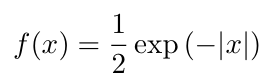 


In [39]:
def func(inp):
    return 0.5*np.exp(-np.abs(inp))

In [40]:
def metropolis_hasting(x_0, N=10000, s=1):
    x_values = [x_0]
    for i in range(1,N):
        xi_minus1 = x_values[-1]
        x_star = random.normal(scale=s, loc=xi_minus1)
        r = func(x_star)/func(xi_minus1)
        u = random.uniform(0,1)

        if np.log(u) < np.log(r):
            x_values.append(x_star)
        else:
            x_values.append(xi_minus1)
        
    return x_values            

         

In [53]:
x_values = metropolis_hasting(x_0=0,s=1)   
print(x_values[1:10])
print(x_values[990:1000])

[0, 0, 0, -0.4202868198197801, -0.4202868198197801, -1.0986882843581656, -0.06219638851171938, 0.059823244866656536, 1.5926387777070394]
[2.468493631605987, 2.7967184942363508, 1.897792137782273, 2.3222132675806053, 2.3222132675806053, 1.8912685776457234, 2.3077971181610453, 2.0009712191575173, 2.3285299833853315, 2.897965431628371]


<function matplotlib.pyplot.show(close=None, block=None)>

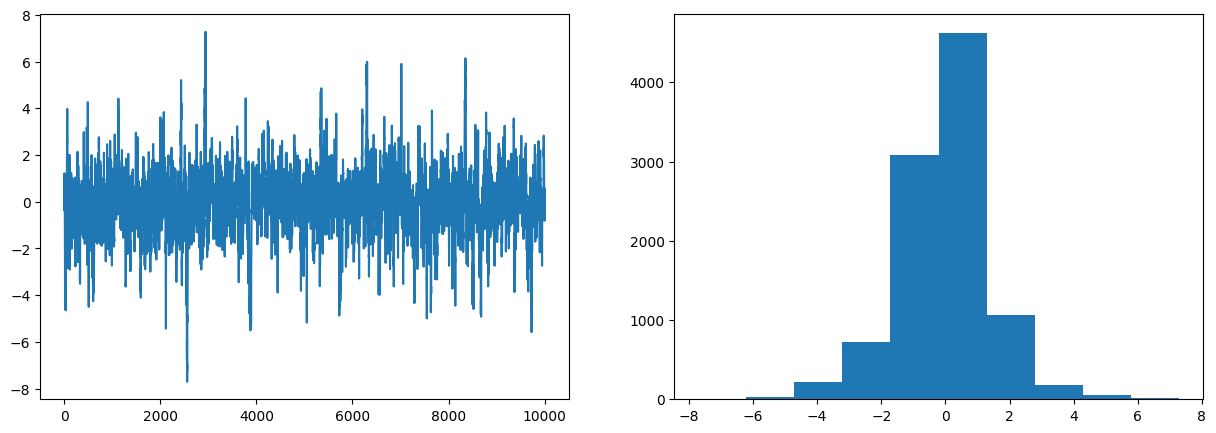

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(x_values)

plt.subplot(1, 2, 2)
plt.hist(x_values)

plt.show

Now for the second part, we introduce chains.

In [43]:
def mean(N=10000):
    return 1/N*sum(x_values)

print("mean:", mean())

def variance(N= 10000):
    mu = mean()  
    squared_diff = [(x - mu) ** 2 for x in x_values]  # Squared differences
    return 1/N*sum(squared_diff)

print("Variance:", variance())

mean: -0.03996655321833011
Variance: 1.9680485808171135


In [44]:
def multi_metropolis_hasting(J, x_0=0, N=2000, s=0.001):
    multi = []
    for i in range(J):
        chain_result = metropolis_hasting(x_0 + i, N, s)
        multi.append(chain_result)
    return multi

chains = multi_metropolis_hasting(J=4)

for i in range(1,4):
    print(chains[i][1:10])


[0.9998916200767892, 1.001524506336629, 0.9999465723094542, 0.9986459085596403, 0.9988446489494075, 0.9980710208100182, 0.9991462530375014, 1.0001141802417715, 1.0011404800319856]
[1.9990794000044785, 1.9987305922018177, 1.9994213479672405, 1.99767550403431, 1.9983156994314089, 1.997846828761889, 1.9978558465867364, 1.9982546302800053, 1.997577322897473]
[2.9991462337478434, 3.0000194219175236, 2.999931396237849, 3.000190840480927, 3.000565073200556, 2.9999097251037234, 2.998717334010808, 2.9979325204988614, 2.997131580928251]


In [45]:
def overall_mean(J,chains, N=2000, output=False):
    means = []
    for i in range(J):
        individual_mean = 1/N*sum(chains[i])
        means.append(individual_mean)
        if output == True:
            print(f"mean {i+1}: {individual_mean}")
    if output==True:
        print(f"total mean: {sum(means)/J}\n")

overall_mean(J=4, chains=chains, N=2000,output=True)


def between_variance(J, chains, N=2000,output=False):
    variances = []
    for i in range(J):
        chain_mean = 1 / N * sum(chains[i])  
        squared_diff = [(x - chain_mean) ** 2 for x in chains[i]]  
        chain_variance = sum(squared_diff) / N  
        variances.append(chain_variance)
        if output==True:
            print(f"Variance {i+1}: {chain_variance}")
    
    total_variance = sum(variances) / J
    if output == True:
        print(f"Overall variance: {total_variance}")
    return total_variance


between_variance(J=4, chains=chains, N=2000,output=True)
btw_var = between_variance(J=4, chains=chains, N=2000) 

def overall_variance(J, chains, N=2000):
    variances = []
    for i in range(J):
        varst = np.var(chains)
    return varst    

print(overall_variance(J=4, chains=chains, N=2000))

ovr_var = overall_variance(J=4, chains=chains, N=2000)


mean 1: -0.011794725412091376
mean 2: 1.0166383833398691
mean 3: 2.0199269339480277
mean 4: 2.9787070552284702
total mean: 1.5008694117760688

Variance 1: 0.0003768596678551924
Variance 2: 0.0003131023332336446
Variance 3: 0.00026306933823120086
Variance 4: 0.00012285083611505223
Overall variance: 0.0002689705438587725
1.2442832936848145


In [46]:
R_hat = np.sqrt((ovr_var+btw_var)/ovr_var)

R_hat

np.float64(1.0001080766780714)

In [47]:
s_values = np.linspace(0.001, 1, 1000)
R_hat_values = []

for s in s_values: 
    chains = multi_metropolis_hasting(J=4, s=s, N=2000, x_0=0)
    btw_var = between_variance(J=4, chains=chains, N=2000)
    ovr_var = overall_variance(J=4, chains=chains, N=2000)
    R_hat = np.sqrt((btw_var + ovr_var) / ovr_var)
    R_hat_values.append(R_hat)



In [48]:
trimmed_R_hat_values = R_hat_values.copy()
for i in range(len(trimmed_R_hat_values) - 1, -1, -1):  # Iterate in reverse
    if trimmed_R_hat_values[i] > 1.05:
        del trimmed_R_hat_values[i]


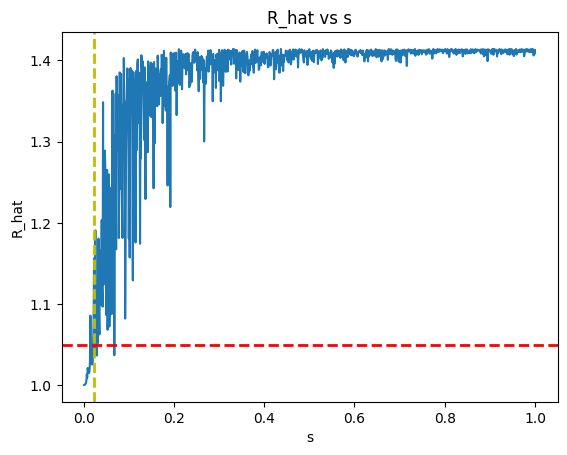

In [49]:
import matplotlib.pyplot as plt
plt.plot(s_values, R_hat_values)
plt.xlabel("s")
plt.ylabel("R_hat")
plt.title("R_hat vs s")
plt.axhline(y=1.05, color='r', linestyle='--', linewidth=2)
plt.axvline(x=len(trimmed_R_hat_values)/1000, color='y', linestyle = '--', linewidth=2)
plt.show()